In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from google.colab import files

uploaded = files.upload()

# Load the dataset
df = pd.read_csv('TravelInsurancePrediction.csv')

In [ ]:
# Displaying the firstlines and columns of the dataset
print(df.head())
print(df.columns)
print(df.info())

   Unnamed: 0  Age               Employment Type GraduateOrNot  AnnualIncome  \
0           0   31             Government Sector           Yes        400000   
1           1   31  Private Sector/Self Employed           Yes       1250000   
2           2   34  Private Sector/Self Employed           Yes        500000   
3           3   28  Private Sector/Self Employed           Yes        700000   
4           4   28  Private Sector/Self Employed           Yes        700000   

   FamilyMembers  ChronicDiseases FrequentFlyer EverTravelledAbroad  \
0              6                1            No                  No   
1              7                0            No                  No   
2              4                1            No                  No   
3              3                1            No                  No   
4              8                1           Yes                  No   

   TravelInsurance  
0                0  
1                0  
2                1  
3       

In [ ]:
df.columns

Index(['Unnamed: 0', 'Age', 'Employment Type', 'GraduateOrNot', 'AnnualIncome',
       'FamilyMembers', 'ChronicDiseases', 'FrequentFlyer',
       'EverTravelledAbroad', 'TravelInsurance'],
      dtype='object')

In [ ]:
# Supprimer l'index inutile
df.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
# Check for Missing Values
print(df.isnull().sum())

Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64


In [ ]:
# Handle Duplicates
df.drop_duplicates(inplace=True)

In [ ]:
# Définir la fonction pour classifier le risque
def classify_risk(age, chronic, flyer):
    if age < 40 and chronic == 0:
        return "Faible"
    elif 40 <= age < 60 or chronic == 1:
        return "Moyen"
    else:  # age >= 60 or (chronic == 1 and flyer == 1)
        return "Élevé"

# Appliquer la classification
df['RiskCategory'] = df.apply(lambda x: classify_risk(x['Age'], x['ChronicDiseases'], x['FrequentFlyer']), axis=1)

# Vérifier les premières lignes
print(df[['Age', 'ChronicDiseases', 'FrequentFlyer', 'RiskCategory']].head())

   Age  ChronicDiseases FrequentFlyer RiskCategory
0   31                1            No        Moyen
1   31                0            No       Faible
2   34                1            No        Moyen
3   28                1            No        Moyen
4   28                1           Yes        Moyen


In [ ]:
print(df['RiskCategory'].value_counts())

RiskCategory
Faible    833
Moyen     416
Name: count, dtype: int64


In [ ]:
# Catégoriser l'âge en groupes
bins = [18, 30, 40, 50, 60, 100]
labels = ['18-30', '31-40', '41-50', '51-60', '60+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

In [ ]:
# Encoder les variables catégoriques pour les visualisations
df['GraduateOrNot'] = df['GraduateOrNot'].map({'Yes': 1, 'No': 0})
df['FrequentFlyer'] = df['FrequentFlyer'].map({'Yes': 1, 'No': 0})
df['EverTravelledAbroad'] = df['EverTravelledAbroad'].map({'Yes': 1, 'No': 0})

In [ ]:
df.to_csv("cleaneddatasetTravelInsurance.csv", index=False)
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 1249 entries, 0 to 1985
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Age                  1249 non-null   int64   
 1   Employment Type      1249 non-null   object  
 2   GraduateOrNot        1249 non-null   int64   
 3   AnnualIncome         1249 non-null   int64   
 4   FamilyMembers        1249 non-null   int64   
 5   ChronicDiseases      1249 non-null   int64   
 6   FrequentFlyer        1249 non-null   int64   
 7   EverTravelledAbroad  1249 non-null   int64   
 8   TravelInsurance      1249 non-null   int64   
 9   RiskCategory         1249 non-null   object  
 10  AgeGroup             1249 non-null   category
dtypes: category(1), int64(8), object(2)
memory usage: 108.8+ KB
None
               Age  GraduateOrNot  AnnualIncome  FamilyMembers  \
count  1249.000000    1249.000000  1.249000e+03    1249.000000   
mean     29.755805       0.838271

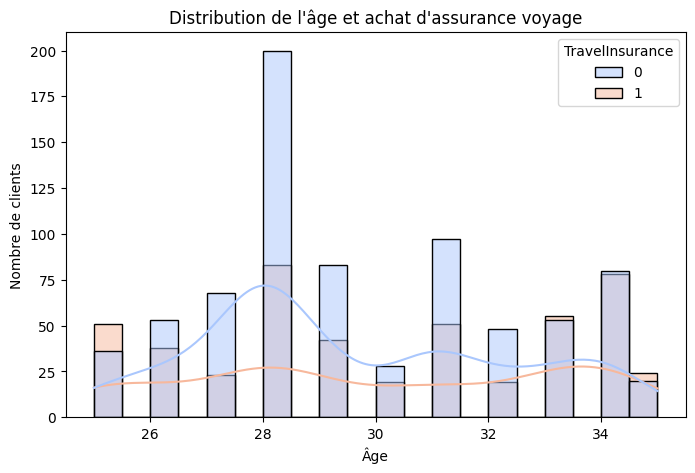

In [ ]:
# 1. Répartition de l'âge avec l'achat d'une assurance voyage
plt.figure(figsize=(8, 5))
sns.histplot(df, x="Age", hue="TravelInsurance", kde=True, bins=20, palette="coolwarm")
plt.title("Distribution de l'âge et achat d'assurance voyage")
plt.xlabel("Âge")
plt.ylabel("Nombre de clients")
plt.show()

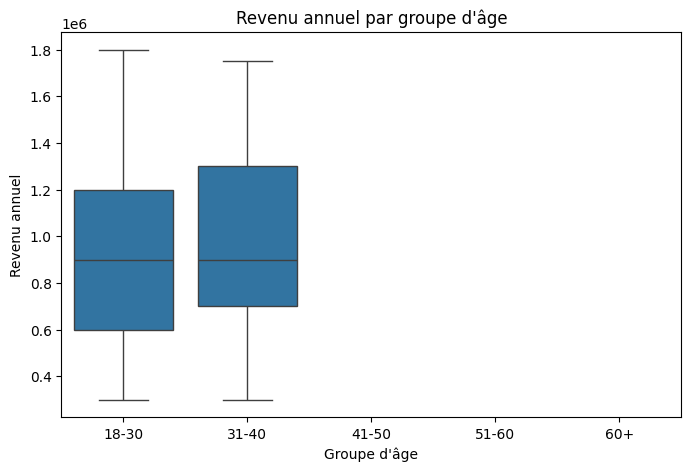

In [ ]:
# 2. Boxplot de l'AnnualIncome par groupe d'âge
plt.figure(figsize=(8, 5))
sns.boxplot(x="AgeGroup", y="AnnualIncome", data=df)
plt.title("Revenu annuel par groupe d'âge")
plt.xlabel("Groupe d'âge")
plt.ylabel("Revenu annuel")
plt.show()

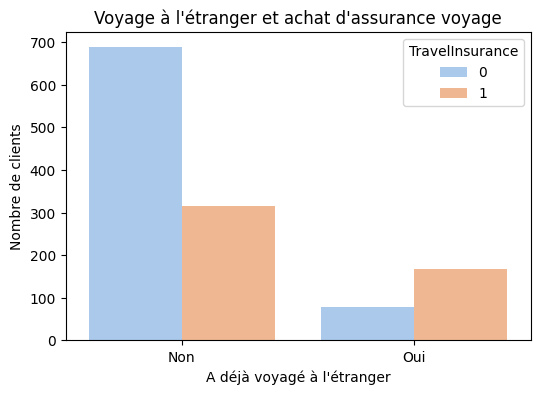

In [ ]:
# 3. Proportion de personnes ayant voyagé à l'étranger et l'achat d'assurance
plt.figure(figsize=(6, 4))
sns.countplot(x="EverTravelledAbroad", hue="TravelInsurance", data=df, palette="pastel")
plt.title("Voyage à l'étranger et achat d'assurance voyage")
plt.xlabel("A déjà voyagé à l'étranger")
plt.ylabel("Nombre de clients")
plt.xticks([0, 1], ["Non", "Oui"])
plt.show()

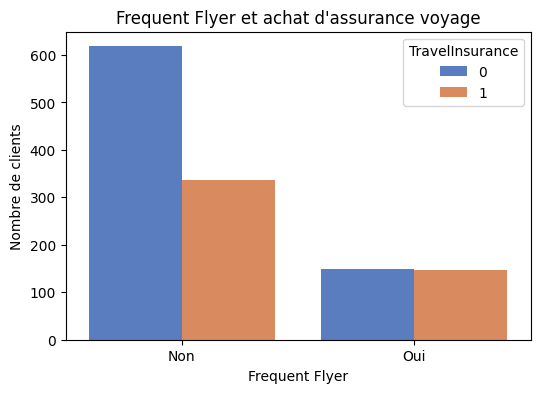

In [ ]:
# 4. Influence du statut de frequent flyer sur l'achat d'assurance
plt.figure(figsize=(6, 4))
sns.countplot(x="FrequentFlyer", hue="TravelInsurance", data=df, palette="muted")
plt.title("Frequent Flyer et achat d'assurance voyage")
plt.xlabel("Frequent Flyer")
plt.ylabel("Nombre de clients")
plt.xticks([0, 1], ["Non", "Oui"])
plt.show()

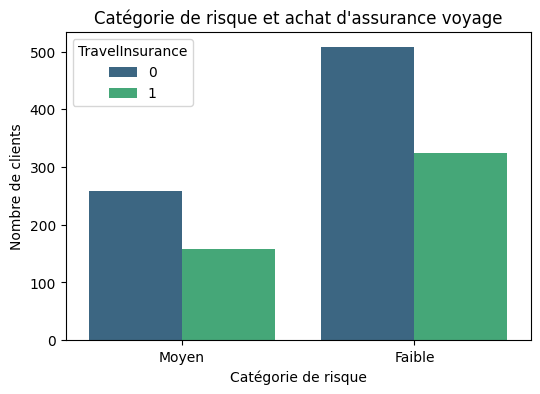

In [ ]:
# 5. Visualisation : Répartition des catégories de risque
plt.figure(figsize=(6, 4))
sns.countplot(x="RiskCategory", hue="TravelInsurance", data=df, palette="viridis")
plt.title("Catégorie de risque et achat d'assurance voyage")
plt.xlabel("Catégorie de risque")
plt.ylabel("Nombre de clients")
plt.show()

In [ ]:
# Afficher les nouvelles colonnes ajoutées
df.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance,RiskCategory,AgeGroup
0,31,Government Sector,1,400000,6,1,0,0,0,Moyen,31-40
1,31,Private Sector/Self Employed,1,1250000,7,0,0,0,0,Faible,31-40
2,34,Private Sector/Self Employed,1,500000,4,1,0,0,1,Moyen,31-40
3,28,Private Sector/Self Employed,1,700000,3,1,0,0,0,Moyen,18-30
4,28,Private Sector/Self Employed,1,700000,8,1,1,0,0,Moyen,18-30
